# Лабораторная работа 6
## Сети Кохонена

Сутдент: Будникова Валерия Павловна 

группа: М8О-407Б-19  

### Цель работы: 
Целью работы является исследование свойств слоя Кохонена, карты Кохонена, а также сетей векторного квантования, обучаемых с учителем, алгоритмов обучения, а также применение сетей в задачах кластеризации и классификации.



### Задание:
 Использовать слой Кохонена для выполнения кластеризации множества точек. Проверить качество разбиения.

In [258]:
import math
import numpy as np
from matplotlib import pyplot as plt
import random as rnd

### Реализация:

Создание карты Кохонена, заполнение ее раздобными значениями от 0 до 1

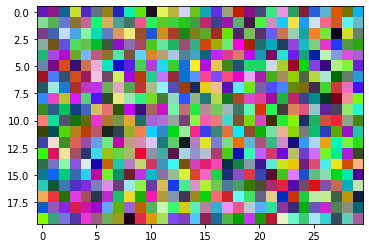

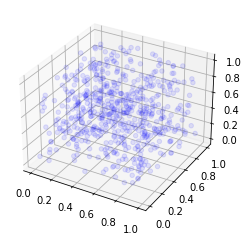

In [259]:
n, m = 30, 20

map = np.ndarray((m * n, 3))

for i in range(m * n):
    map[i] = np.array([rnd.uniform(0, 1), rnd.uniform(0, 1), rnd.uniform(0, 1)])


mp = map.reshape(m, n, 3)

plt.imshow(mp)
plt.show()

ax = plt.axes(projection='3d')
ax.scatter3D(mp[..., 0], mp[..., 1], mp[..., 2], alpha=0.1, color = 'blue')

Создание обучающей выбоки:

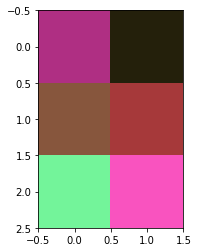

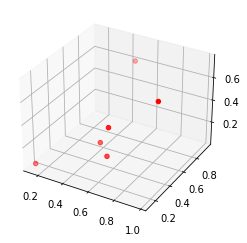

In [260]:
n1, m1 = 2, 3

data_train = np.ndarray((m1 * n1, 3))

for i in range(m1 * n1):
    data_train[i] = np.array([rnd.uniform(0, 1), rnd.uniform(0, 1), rnd.uniform(0, 1)])

dt = data_train.reshape(m1, n1, 3)

plt.imshow(dt)
plt.show()

ax = plt.axes(projection='3d')
ax.scatter3D(dt[..., 0], dt[..., 1], dt[..., 2], color = 'r')


Общий вид точек на плоскости:

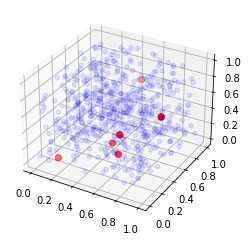

In [261]:
ax = plt.axes(projection='3d')
ax.scatter3D(dt[..., 0], dt[..., 1], dt[..., 2], color = 'red', s = 40)
ax.scatter3D(mp[..., 0], mp[..., 1], mp[..., 2], alpha=0.1, color = 'blue')

Реализация сети Кохонена:

In [262]:
class Kohonen:
    def __init__(self, map, n, m, lr):
        self.map = map
        self.n = n
        self.m = m
        self.r = max(n, m) // 2
        self.lr = lr
        
    def train(self, data, epochs):
        r0 = self.r
        for ep in range(epochs):
            for point in data:
                # print(np.array(point))
                # print(np.array(self.map))
                # print(np.array(self.map - np.array(point)))
                
                min_ind = np.argmin(np.linalg.norm(np.array(self.map) - np.array(point), axis = 1))
                min_i = min_ind // self.m
                min_j = min_ind % self.n
                # print(np.array(self.map).shape)
                # print((np.linalg.norm(np.array(self.map) - np.array(point), axis = 1)).shape)

                for ind in range(len(self.map)):
                    i = ind // self.m
                    j = ind % self.n
                    distance = np.linalg.norm(np.array([i - min_i, j - min_j])) 

                    if distance <= self.r: 
                        influence = np.exp(-distance/(2 * self.r))
                        self.map[ind] += influence * (point - self.map[ind]) * self.lr
            
            self.r = r0 * np.exp(-ep / epochs * np.log2(r0))
            self.lr = np.exp(-ep / epochs)
    def result(self):
        return self.map



In [263]:
k = Kohonen(map, m=m, n=n, lr = 1)
k.train(data_train, 10)
rez = k.result()

Результат работы сети:

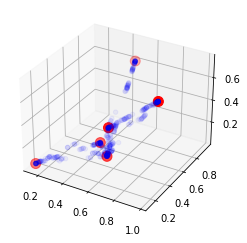

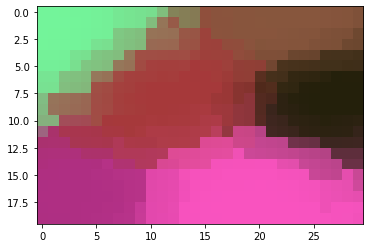

In [264]:
r = rez.reshape(m, n, 3)
ax = plt.axes(projection='3d')
ax.scatter3D(dt[..., 0], dt[..., 1], dt[..., 2], color = 'red', s = 100)
ax.scatter3D(r[..., 0], r[..., 1], r[..., 2], alpha=0.05, color = 'blue')
plt.show()

plt.imshow(r)
plt.show()

for r in rez:
    if (r > [1, 1, 1]).any():
        print(r)

#### Вывод
В данной лабораторной работе я реализовала сеть Кохонена для кластеризации точек. Из результатов работы можно сделать вывод о том, что точки карты Кохонена, находящиеся на примерно одинаковом расстоянии от нескольких точек обучающей выборки будут совсем слабо менять свои значени. Это происходит потому, что каждая точка обучающей выборки будет сдвигать значения точки из карты в свою сторону. 